# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 or later syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npy files, and will contain data in a single numpy array corresponding to the unlabelled data X of shape num_samples by num_dimensions

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # This will be commented out during evaluation. Write your own k-means code.
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from matplotlib.patches import Ellipse

def practical_eigen_symmetric(L):
    # Returns the eigen values and eigen vectors of a symmetric matrix L. eigen values are sorted in ascending order, and eig_vecs[:,i] corresponds to the ith eigen vector
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

# Q1 Spectral Clustering.

Write code for doing spectral clustering below. 

i.e. Convert the unlabelled data (Data A) into an adjacency matrix using D_{i,j} = exp(-\gamma * ||x_i - x_j||). Convert the adjacency matrix into a Laplacian and find the lowest n eigen-vectors and use that to create feature matrix of shape num_samples-by-n. Use k-means clustering to cluster the resulting data.  

Now plot the following scatterplots of the data with clusterlabels as colors.


1. The results of k-means clustering on the raw data with k=3.
2. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,3 and 3.
3. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,10 and 3.
4. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 3 and 3.
5. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 10 and 3.


Comment on the nature of the results in the text cell below.

You are only allowed to use the pratical eigen vector finder given as defined above here. This is meant to simulate real eigen solvers which are iterative and approximate in nature. You can use the import of KMeans from sklearn to begin with, but the final submission should be based on your own implementation of kMeans or there will be a penalty.




In [5]:
# Codewrite cell (Use as you wish)
def k_means(X,centers):
    #
    cluster_id=np.zeros(X.shape[0])
    for k in range(30):
        for i in range(X.shape[0]):
            cluster_id[i]=np.argmin([np.linalg.norm(X[i]-centers[j]) for j in range(centers.shape[0])])
        centers=np.array([np.mean(X[cluster_id==m],axis=0) for m in range(centers.shape[0])])
    center_id={i:centers[i] for i in range(centers.shape[0])}
    return cluster_id

def adjacency_matrix(X,gamma):
    n=X.shape[0]
    A=np.zeros((n,n))
    for i in range(n):
        for j in range(i,n):
            A[i][j]=np.exp(-gamma*np.linalg.norm(X[i]-X[j])) 
            A[j][i]=A[i][j]
    return A

def laplacian(A):
    D=np.zeros(A.shape)
    for i in range(A.shape[0]):
        D[i][i]=np.sum(A[i])
    L=D-A
    return L

def spectral_clustering(X,gamma,n,k):
    A=adjacency_matrix(X,gamma)
    L=laplacian(A)
    #print(L)
    eig_vals,eigen_vecs=practical_eigen_symmetric(L)
    #print(eig_vals)
    eigen_vecs=eigen_vecs[:,:n]
    
    centers=np.zeros((k,n))
    for i in range(k):
        for j in range(n):
            centers[i][j]=np.random.uniform(low=np.min(eigen_vecs[:,j]),high=np.max(eigen_vecs[:,j]))
    #print(centers)
    cluster_id=k_means(eigen_vecs,centers)
    return cluster_id



    
#plt.scatter(data_a[:,0],data_a[:,1])
#plt.show()

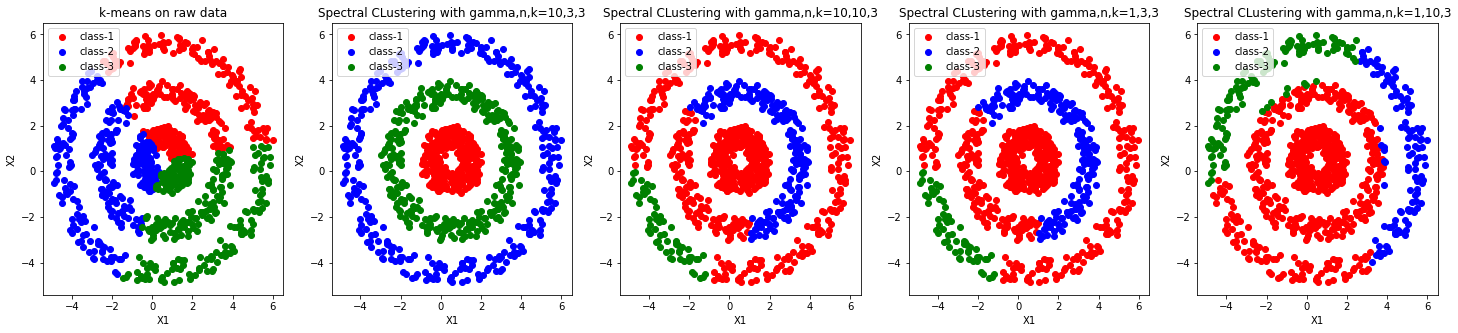

In [6]:
# Codewrite cell (Get the 5 scatter plots here)
data_a=np.load('Data/Dataset_A.npy')
centers=np.array([np.array([0,4]),np.array([0,0]),np.array([0,-4])])
color_id=k_means(data_a,centers)
cluster_id_1=spectral_clustering(data_a,10,3,3)
cluster_id_2=spectral_clustering(data_a,10,10,3)
cluster_id_3=spectral_clustering(data_a,1,3,3)
cluster_id_4=spectral_clustering(data_a,1,10,3)
clusters=[color_id,cluster_id_1,cluster_id_2,cluster_id_2,cluster_id_3]
titles=['k-means on raw data','Spectral CLustering with gamma,n,k=10,3,3','Spectral CLustering with gamma,n,k=10,10,3','Spectral CLustering with gamma,n,k=1,3,3','Spectral CLustering with gamma,n,k=1,10,3']
fig,axs=plt.subplots(1,5,figsize=(25,5))

for i in range(5):
    X1=data_a[clusters[i]==0]
    X2=data_a[clusters[i]==1]
    X3=data_a[clusters[i]==2]
    axs[i].scatter(X1[:,0],X1[:,1],c='red',label='class-1')
    axs[i].scatter(X2[:,0],X2[:,1],c='blue',label='class-2')
    axs[i].scatter(X3[:,0],X3[:,1],c='green',label='class-3')
    axs[i].set_xlabel('X1')
    axs[i].set_ylabel('X2')
    axs[i].legend()
    axs[i].set_title(titles[i])
plt.show()



# Textwrite cell 

1. Performing k means on the raw data resulted in a classification based on the sector/angle, the vector containing the point made with a reference axis. 
2. The results from k-means on the raw data is quite obvious upon visually inspection of the raw data which necessitates the importance of doing a feature transform to get clusters that can be identified properly by the k means algorithm.
3. The expected clusters were obtained using spectral clustering with gamma,n,k=10,3,3. The identified clusters upon modifying the parameter values were incorrect .
4. Upon increasing the value of n from 3 to 10, the feature vectors obtained are now 10 dimensional . Hoewver , the preceding eigenvectors lead to an increase in the loss value leading to incorrect predictions as we see in Fig 3.
5. Upon decreasing the gamma value, the entries in the original adjacency matrix which were closer to zero attain higher values. (spurious edges with greater edge weights) . This has once again resulted in incorrect predictions as seen in fig 4 and fig5.

# Q2: DB Scan

Cluster the dataset B using DBScan. You may use the inbuilt DBscan function in sklearn  Explore the eps and min_samples parameter. 

Give a scatterplot of the datapoints that are not labelled as outlier by DBScan. Color the data points based on cluster label. 

Use eps values (0.1, 0.3 and 1) and min_samples values (3,10,30) for a total of 9 plots. Summarise your conclusions in the textwrite cell.

In [9]:
# Codewrite cell (Use as you wish)

def scatter_DBSCAN(data,ax,eps,min_samples):
    clustering=np.array(DBSCAN(eps=eps,min_samples=min_samples).fit(data).labels_)
    data_core_points=data[clustering!=-1]
    color_id=clustering[clustering!=-1]
    colormap = plt.cm.get_cmap('viridis')
    ax.scatter(data_core_points[:,0],data_core_points[:,1],c=color_id,cmap=colormap)
    ax.set_title(f'DBSCAN using eps {eps} and min_samples={min_samples}')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')




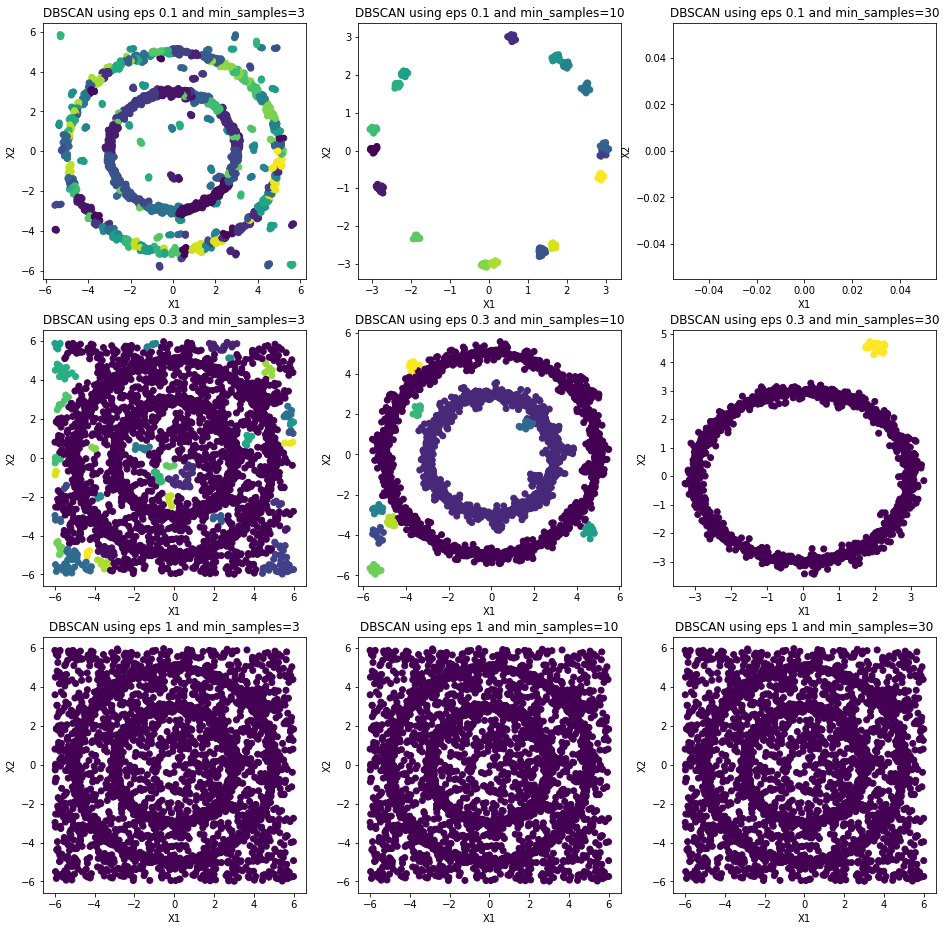

In [10]:
# Codewrite cell. Get the 9 plots here.
data_b=np.load('Data/Dataset_B.npy')
eps=[0.1,0.3,1]
min_samples=[3,10,30]
fig,axs=plt.subplots(3,3,figsize=(16,16))
for i in range(3):
    for j in range(3):
        scatter_DBSCAN(data_b,axs[i][j],eps[i],min_samples[j])
plt.show()

# Textwrite cell

Eps and min_samples denote the min number of data points that is within a radius of eps around a chosen point to be considered a core point
1. When eps=0.1, the number of outliers are rather large and the connected components becomes fragmented on increasing the min samples from 3 to 10 and reduces to nothing when min samples is increased to 30.
2. When eps=0.3, there is a greater density of points in the connected components for min samples =3. Upon increasing the min samples to 10, 2 concentric circles where the points in the same circle are of the same color are obtained indicating the connected components are concentric rings here. When increasing the min samples to 30, only one concentric circle is obtained and another connected component away from the ring is obtained.
3. When eps=1, irrespective of the value of min samples all the points have been identified as one connected component 


# Q3: PCA and k-Nearest Neighbours

Consider the Digits dataset that is a part of the sklearn library. It consists of 1797 64 dimensional vectors with each corresponding to an 8x8 image of a digit. The label also gives the digit id. It is a 10-class classification problem.

Choose a random subset of size 1500 for train and the rest for testing. Run k-Nearest neighbours with k values 1,3,7,15 and 31 and report the training and test accuracy. 

Repeat the above after performing PCA on the data. Use top n-principal components for n=2,4,8,16,32. For each n in the list report the best k-NN test accuracy and the k which achieves that accuracy and the approximation error for this particular value of n.

Repeat the above for a noisy version of the data. i.e. add a random Gaussian noise of mean zero and variance 1 to all the 1797*64 input numbers.

In total, the results should be given in 4 tables in the last textwrite cell:. Summarise your findings in a paragraph.

Table 1: Raw data , k-NN performance. One row for each k.

Table 2: n-component PCA preprocessed data k-NN performance. One row for each n.

Table 3: Raw noised data, k-NN performance. One row for each k.

Table 4: n-component PCA preprocessed noised data k-NN performance. One row for each n.

In [26]:
# Codewrite cell (Use as you wish)
def knn(test_train,train_target,k,self_eval=False):
    target_pred=np.zeros(test_train.shape[0])
    for i in range(target_pred.shape[0]):
        temp_target=[train_target[j] for j in np.argsort(test_train[i])[:k]]
        counts=np.bincount(temp_target)
        target_pred[i]=np.argmax(counts)
    return target_pred

def accuracy(y_target,y_pred):
    return np.sum((y_target-y_pred)==0)/(y_pred.shape[0])
def add_noise(data):
    return data+np.random.normal(0,1,size=data.shape)

def pca(X,n):
    S=np.cov(X,rowvar=False)
    temp,U=practical_eigen_symmetric(S)
    U=U[:,-n:][:, ::-1]
    Z=np.zeros((X.shape[0],n))
    for i in range(X.shape[0]):
        Z[i]=np.array([np.dot(X[i],U[:,j].T) for j in range(n)])
    return Z,np.sum(temp[:-n])

def test_train_distance(test_X,train_X):
    test_train=np.zeros((test_X.shape[0],train_X.shape[0]))
    for i in range(test_X.shape[0]):
        for j in range(train_X.shape[0]):
            test_train[i][j]=np.linalg.norm(test_X[i]-train_X[j])
    return test_train

    
    


        
    



In [41]:
# Codewrite cell (Do the experiments for filling Tables 1 and 2 here)
digits=load_digits()
k=[1,3,7,15,31]
#print(digits.target[55])
target=digits.target
images=digits.images
data=digits.data

train_data=data[:1500]
train_target=target[:1500]

test_data=data[1500:]
test_target=target[1500:]

train_train=test_train_distance(train_data,train_data)
test_train=test_train_distance(test_data,train_data)
#y_pred_test=knn(train_train,train_target,1)

table1=np.zeros((5,2))
test_datas=[train_data,test_data]
test_trains=[train_train,test_train]
targets=[train_target,test_target]
for i in range(5):
    for j in range(2):
        pred_temp=knn(test_trains[j],train_target,k[i])
        table1[i][j]=accuracy(targets[j],pred_temp)
#print(table1)

table2=np.zeros((5,5))
n=[2,4,8,16,32]
best_k=[]
best_accuracy=[]
approx_error=[]
for i in range(5):
    temp_data,approx_error_curr=pca(data,n[i])
    temp_train=temp_data[:1500]
    temp_test=temp_data[1500:]
    temp_test_train=test_train_distance(temp_test,temp_train)
    accuracy_best=0
    approx_error.append(approx_error_curr)
    for j in range(5):
        pred_temp=knn(temp_test_train,train_target,k[j])
        table2[i][j]=accuracy(test_target,pred_temp)
        if accuracy_best<table2[i][j]:
            accuracy_best=table2[i][j]
            curr_k_best=k[j]
            curr_accuracy_best=table2[i][j]
    best_k.append(curr_k_best)  
    best_accuracy.append(curr_accuracy_best)
#print(table2)
for i in range(5):
    print(f'The best knn accuracy achieved on test data for n={n[i]}: {best_accuracy[i]} and the best k value is {best_k[i]} and the approximation error for this value of n is {approx_error[i]}')
    


The best knn accuracy achieved on test data for n=2: 0.6060606060606061 and the best k value is 31 and the approximation error for this value of n is 859.4230351810538
The best knn accuracy achieved on test data for n=4: 0.8215488215488216 and the best k value is 7 and the approximation error for this value of n is 616.534220885922
The best knn accuracy achieved on test data for n=8: 0.9191919191919192 and the best k value is 15 and the approximation error for this value of n is 392.01288463174416
The best knn accuracy achieved on test data for n=16: 0.9494949494949495 and the best k value is 1 and the approximation error for this value of n is 181.0404491946043
The best knn accuracy achieved on test data for n=32: 0.9562289562289562 and the best k value is 3 and the approximation error for this value of n is 40.447213122696695


In [40]:
# Codewrite cell (Do the experiments for filling Tables 3 and 4 here)
digits=load_digits()
k=[1,3,7,15,31]
#print(digits.target[55])
target=digits.target
images=digits.images
data=digits.data
data=add_noise(data)
train_data=data[:1500]
train_target=target[:1500]

test_data=data[1500:]
test_target=target[1500:]

train_train=test_train_distance(train_data,train_data)
test_train=test_train_distance(test_data,train_data)
#y_pred_test=knn(train_train,train_target,1)

table3=np.zeros((5,2))
test_datas=[train_data,test_data]
test_trains=[train_train,test_train]
#train_targets=[train_t]
targets=[train_target,test_target]
for i in range(5):
    for j in range(2):
        pred_temp=knn(test_trains[j],train_target,k[i])
        table3[i][j]=accuracy(targets[j],pred_temp)

#a=accuracy(train_target,y_pred_test)
#print((train_target-y_pred_test)[0:100])
#print(table3)

table4=np.zeros((5,5))
n=[2,4,8,16,32]
best_k=[]
best_accuracy=[]
approx_error=[]
for i in range(5):
    temp_data,approx_error_curr=pca(data,n[i])
    temp_train=temp_data[:1500]
    temp_test=temp_data[1500:]
    temp_test_train=test_train_distance(temp_test,temp_train)
    accuracy_best=0
    approx_error.append(approx_error_curr)
    for j in range(5):
        pred_temp=knn(temp_test_train,train_target,k[j])
        table4[i][j]=accuracy(test_target,pred_temp)
        if accuracy_best<table4[i][j]:
            accuracy_best=table4[i][j]
            curr_k_best=k[j]
            curr_accuracy_best=table4[i][j]
    best_k.append(curr_k_best)  
    best_accuracy.append(curr_accuracy_best)
#print(table4)
for i in range(5):
    print(f'The best knn accuracy achieved on noisy test data for n={n[i]}: {best_accuracy[i]} and the best k value is {best_k[i]} and the approximation error for this value of n is {approx_error[i]}')
    





The best knn accuracy achieved on noisy test data for n=2: 0.6094276094276094 and the best k value is 31 and the approximation error for this value of n is 923.4873803642657
The best knn accuracy achieved on noisy test data for n=4: 0.8148148148148148 and the best k value is 15 and the approximation error for this value of n is 678.3715884814982
The best knn accuracy achieved on noisy test data for n=8: 0.9158249158249159 and the best k value is 3 and the approximation error for this value of n is 448.2159331534311
The best knn accuracy achieved on noisy test data for n=16: 0.9494949494949495 and the best k value is 7 and the approximation error for this value of n is 228.83683507672788
The best knn accuracy achieved on noisy test data for n=32: 0.9562289562289562 and the best k value is 3 and the approximation error for this value of n is 71.49017868362287


# Textwrite cell

**Table-1**



| k | Training Accuracy | Test Accuracy|
|---|-------------------|----|
| 1 | 1 | 0.94612795 |
| 3 | 0.994 | 0.95959596 |
| 7 | 0.9906667 | 0.94612795 |
| 15 | 0.986 | 0.93939394 |
| 31| 0.972 | 0.93265993 |

**Table-2**

| n | k=1 | k=3 | k=7 | k=15 | k=31 |
| - | - | - | - | - | - |
| 2 | 0.5589225589225589 | 0.5589225589225589 | 0.5892255892255892 | 0.5824915824915825 | 0.6060606060606061 |
| 4 | 0.7744107744107744 | 0.797979797979798 | 0.8215488215488216 | 0.8148148148148148 | 0.8114478114478114 |
| 8 | 0.898989898989899 | 0.9158249158249159 | 0.9158249158249159 | 0.9191919191919192 | 0.898989898989899 |
| 16 | 0.9494949494949495 | 0.9461279461279462 | 0.9461279461279462 | 0.9427609427609428 | 0.9158249158249159 |
| 32 | 0.9461279461279462 | 0.9562289562289562 | 0.9528619528619529 | 0.9427609427609428 | 0.9326599326599326 | 

**Table-3**

| k | Training Accuracy | Test Accuracy|
|---|-------------------|----|
| 1 | 1 | 0.94612795 |
| 3 | 0.994 | 0.94612795 |
| 7 | 0.992 | 0.94612795 |
| 15 | 0.98733333 | 0.94276094 |
| 31| 0.972 | 0.91919192 |



**Table-4**

| n | k=1 | k=3 | k=7 | k=15 | k=31 |
| - | - | - | - | - | - |
| 2 | 0.5420875420875421 | 0.5420875420875421 | 0.5589225589225589 | 0.5824915824915825 | 0.5925925925925926 |
| 4 | 0.7474747474747475 | 0.7946127946127947 | 0.8080808080808081 | 0.7912457912457912 | 0.797979797979798 |
| 8 | 0.8922558922558923 | 0.9057239057239057 | 0.8956228956228957 | 0.8888888888888888 | 0.8956228956228957 |
| 16 | 0.9393939393939394 | 0.9461279461279462 | 0.9326599326599326 | 0.9326599326599326 | 0.9124579124579124 |
| 32 | 0.9528619528619529 | 0.9461279461279462 | 0.936026936026936 | 0.9393939393939394 | 0.9191919191919192 |


# Q4 : Expectation Maximisation for GMM.

Use Dataset C for learning the parameters of a GMM using Expectation maximization. Set the number of compoents as 3. 

Plot the contours of the estimated components at init, and after 1 EM iteration, 2 EM iterations, 4 EM iterations and 8 EM iterations. (A single elliptical contour for each component is sufficient.) Add the scatterplot of the data points too here. 

Also, estimate plot the log likelihood of the data and the lower bound L(q,\theta) thatis optimised as a function of the EM iteration number.

Expected output: 4 plots giving the component means and variances along with the scatterplot. One plot giving iterations vs L(q;theta) and ln P(X|theta).

You may use the code below for plotting the elliptical contours of the estimated components. It requires you to pass the axes of the plot figure as an argument.

In [2]:
# Code read
def plot_ellipses_gmm(means, covariances,ax):
    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):
        
        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none')
        ax.add_artist(ell)


In [11]:
# Codewrite cell (Use as you wish)
def calculate_gamma(X,means,covariances,pi):
    gamma=np.zeros((X.shape[0],len(means)))
    for i in range(X.shape[0]):
        denominator=0
        for j in range(len(means)):
            gamma[i][j]=pi[j]*np.exp(-0.5*np.matmul(np.matmul((X[i]-means[j]).T,np.linalg.inv(covariances[j])),(X[i]-means[j])))/(np.sqrt(np.linalg.det(covariances[j])))
            denominator+=gamma[i][j]
        gamma[i]/=denominator
    return gamma

def update_M_step(X,gamma):
    means=[]
    covariances=[]
    pi=[]
    for i in range(gamma.shape[1]):
        curr_mu=sum([gamma[j][i]*X[j] for j in range(X.shape[0])])/sum([gamma[j][i] for j in range(X.shape[0])])
        means.append(curr_mu)
        gamma_diagonal=np.diag(gamma[:,i].T)
        pi.append(sum([gamma[j][i] for j in range(X.shape[0])])/X.shape[0])
        #print(np.tile(curr_mu.reshape(2,1),(1,X.shape[0])).shape)
        covariances.append(np.matmul(np.matmul((X.T-np.tile(curr_mu.reshape(2,1),(1,X.shape[0]))),gamma_diagonal),(X-np.tile(curr_mu.reshape(2,1),X.shape[0]).T))/(sum([gamma[j][i] for j in range(X.shape[0])])))
    return means,covariances,pi        

def find_likelihood(X,means,covariances,pi):
    log_likelihood=0
    for i in range(X.shape[0]):
        temp_likelihood=0
        for j in range(len(means)):
            temp_likelihood+=(pi[j]*np.exp(-0.5*np.matmul(np.matmul((X[i]-means[j]),np.linalg.inv(covariances[j])),(X[i]-means[j]).T)))/(np.linalg.det(covariances[j])**(0.5))
        log_likelihood+=np.log(temp_likelihood)
    return log_likelihood

def run_em(X,num_iter,option=1):
    pi=[1/3,1/3,1/3]
    covariances=[np.eye(2),np.eye(2),np.eye(2)]
    means=[X[0],X[5],X[9]]
    log_likelihood=[]
    L=[]
    for i in range(num_iter):
        gamma=calculate_gamma(X,means,covariances,pi)
        means,covariances,pi=update_M_step(X,gamma)
        curr_likelihood=find_likelihood(X,means,covariances,pi)
        log_likelihood.append(curr_likelihood)
        gamma_new=calculate_gamma(X,means,covariances,pi)
        kl_divergence=0
        for i in range(gamma.shape[0]):
            for j in range(gamma.shape[1]):
                kl_divergence+=gamma[i][j]*(np.log(gamma_new[i][j]/gamma[i][j]))
        L.append(curr_likelihood-kl_divergence)
    if option==1:
        return means,covariances,pi
    else:
        return log_likelihood,L



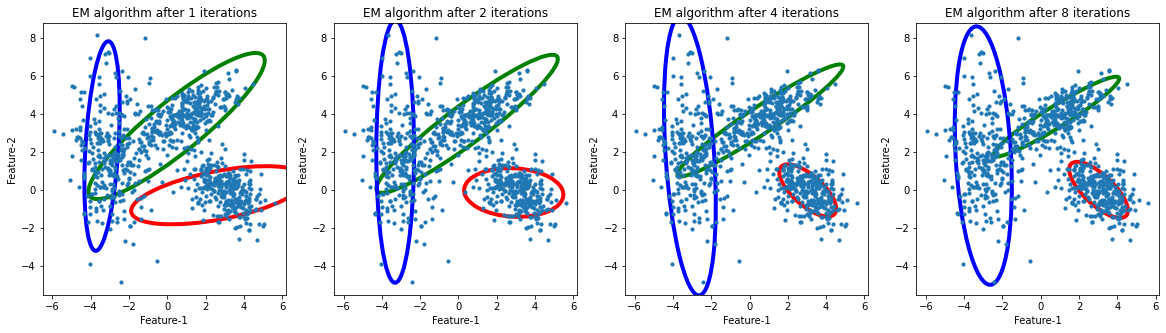

In [12]:
# Code write: Get the four plots with component contours here
data=np.load('Data/Dataset_C.npy')
n=[1,2,4,8]
fig,axs=plt.subplots(1,4,figsize=(20,5))
for i in range(4):
    means,covariances,pi=run_em(data,n[i])
    plot_ellipses_gmm(means, covariances,axs[i])
    axs[i].scatter(data[:,0],data[:,1],s=10)
    axs[i].set_xlabel('Feature-1')
    axs[i].set_ylabel('Feature-2')
    axs[i].set_title(f'EM algorithm after {n[i]} iterations')
plt.show()

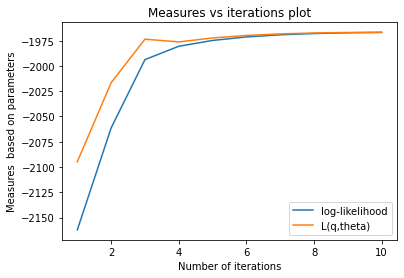

In [13]:
#Code write: Get the plot of iterations vs L(q;theta) and ln P(X|theta) here. 

log_likelihood,L=run_em(data,10,option=2)
#print(log_likelihood)
iterations=[i for i in range(1,11)]
plt.plot(iterations,log_likelihood)
plt.plot(iterations,L)
plt.xlabel('Number of iterations')
plt.ylabel('Measures  based on parameters')
plt.legend(['log-likelihood','L(q,theta)'])
plt.title('Measures vs iterations plot')
plt.show()
